This dataset is used in "Facial recognition technology can infer political orientation from naturalistic facial images" by Michal Kosinski and is available at https://osf.io/c58d3/.

In the research, the predictive power of big five personality traits (and of some other features) are compared to the predictive power of facial features extracted from face images. The results showed that the face recognition algorithm did better at predicting political orientation than all other features, and combinations of relevant features. 

Big five personality traits combined gives an accuracy of 66% while face recognition algorithms gives 73%. Among five personality traits, most powerful predictor of political orientation is opennes, reaching to 65% accuracy on its own.

Five of the features in the dataset are informative about subjects' personality traits, expressed in big-five factor structure (extraversion, neuroticism, agreeableness, conscientiousness and openness to experience.)

# Exploring the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
faces = pd.read_csv('faces.csv') # original dataset used in the research, containing other traits of subjects such as emotion, head position and existence of facial hair of glasses
big5 = faces[['gender','age','country','ext', 'neu', 'ope', 'agr', 'con', 'pol']]

In [3]:
big5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085795 entries, 0 to 1085794
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   gender   1085179 non-null  float64
 1   age      417992 non-null   float64
 2   country  1085795 non-null  object 
 3   ext      98973 non-null    float64
 4   neu      98973 non-null    float64
 5   ope      98973 non-null    float64
 6   agr      98973 non-null    float64
 7   con      98973 non-null    float64
 8   pol      1085795 non-null  object 
dtypes: float64(7), object(2)
memory usage: 74.6+ MB


- No missing data in 'country' and 'pol' columns
- Imputable amount of missing data in 'gender' column (we could assign them an extra class like "other")
- Huge amount of missing data in rest

In [4]:
big5[big5.country != 'united states'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115007 entries, 658 to 1085765
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   gender   115007 non-null  float64
 1   age      141 non-null     float64
 2   country  115007 non-null  object 
 3   ext      0 non-null       float64
 4   neu      0 non-null       float64
 5   ope      0 non-null       float64
 6   agr      0 non-null       float64
 7   con      0 non-null       float64
 8   pol      115007 non-null  object 
dtypes: float64(7), object(2)
memory usage: 8.8+ MB


Big five data is only present for subjects from United States.

## Discrete variables: gender, country, pol

In [5]:
def show_class_distr(feature):
    plt.pie(big5[feature].value_counts(), labels=big5[feature].value_counts().index)

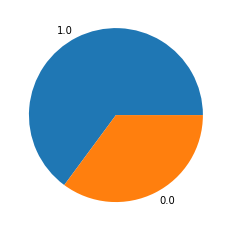

In [6]:
show_class_distr('gender') # encoding: 1 for male, 0 for female

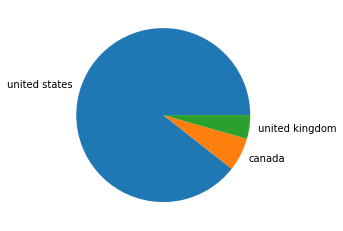

In [7]:
show_class_distr('country')

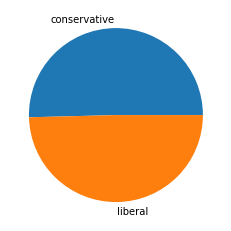

In [8]:
show_class_distr('pol')

## Continous Variables

In [9]:
big5.drop(['gender','country','pol'],axis=1).skew()

age    0.604056
ext   -0.455947
neu    0.194758
ope   -0.627616
agr   -0.466859
con   -0.213306
dtype: float64

- High skewnesses excluding 'neu' and 'con'

<AxesSubplot:xlabel='age'>

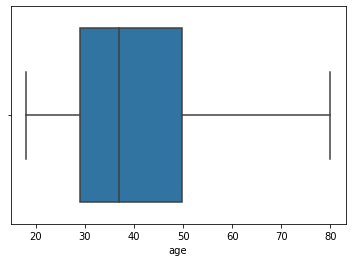

In [10]:
sns.boxplot(data=big5, x='age')

<AxesSubplot:xlabel='ext'>

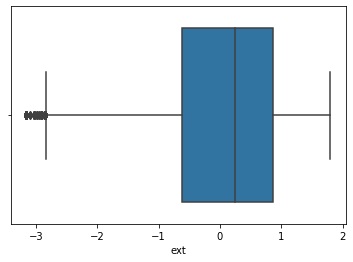

In [11]:
sns.boxplot(data=big5, x='ext')

<AxesSubplot:xlabel='neu'>

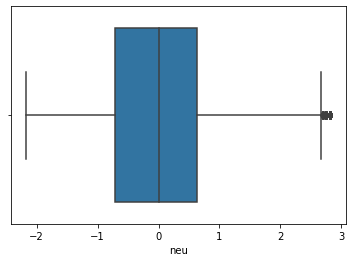

In [12]:
sns.boxplot(data=big5, x='neu')

<AxesSubplot:xlabel='ope'>

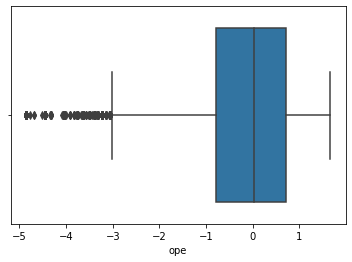

In [13]:
sns.boxplot(data=big5, x='ope')

<AxesSubplot:xlabel='agr'>

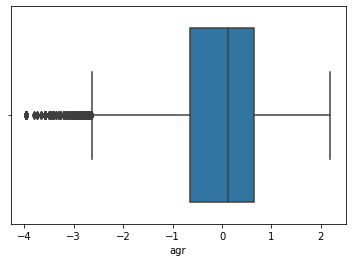

In [14]:
sns.boxplot(data=big5, x='agr')

<AxesSubplot:xlabel='con'>

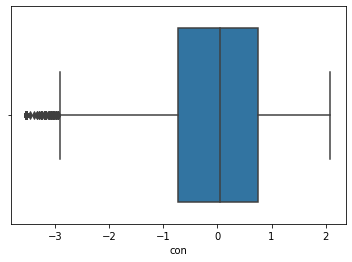

In [15]:
sns.boxplot(data=big5, x='con')

- Outliers exist at any column except 'age'
- Scales are similar if you're not including 'age' column 

## Insights related to big five personality traits

In [16]:
le = LabelEncoder()
le.fit(big5.loc[:,'pol'])
big5.loc[:,'pol'] = le.transform(big5.loc[:,'pol'])

C:\Users\tlgru\miniconda3\envs\mlpy3810\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
list(le.inverse_transform([0,1]))

['conservative', 'liberal']

<AxesSubplot:>

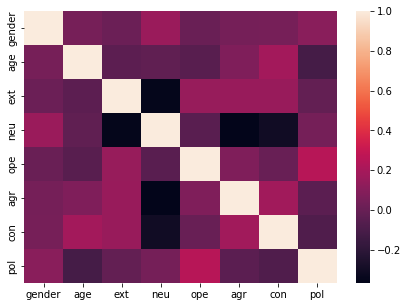

In [18]:
corr = big5.corr()
plt.subplots(figsize=(7, 5))
sns.heatmap(corr)

<AxesSubplot:xlabel='pol', ylabel='ope'>

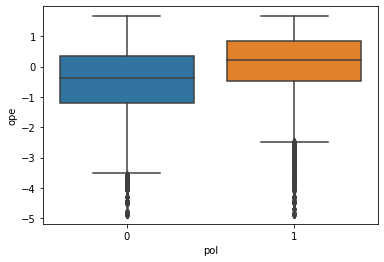

In [19]:
sns.boxplot(data=big5, x='pol', y='ope')

- Openness is the greatest determinator of political orientation among five personality traits

# Modeling

In [20]:
from sklearn.linear_model import LogisticRegressionCV

We'll develop a model to predict political orientation using big five personality traits.

In [21]:
data = big5[['ext', 'neu', 'ope', 'agr', 'con', 'pol']].dropna()

In [22]:
data

,ext,neu,ope,agr,con,pol
0,1.022968,-1.084406,1.049730,0.265963,0.328752,1
1,0.367612,1.467204,0.532329,-2.072064,-0.724279,1
2,0.558261,-1.740534,-0.570139,0.650702,0.679762,0
3,0.558261,0.634025,0.438256,-0.503514,-2.128320,1
4,1.301793,-0.990673,0.802995,-0.657410,1.171176,1
...,...,...,...,...,...,...
1085787,0.248456,-1.240627,-0.377042,-0.118775,0.679762,1
1085788,-0.990764,-0.053347,-0.827602,0.035120,-0.654077,0
1085790,0.868066,0.321583,0.438256,-2.042469,1.381782,1
1085791,1.487676,-1.553069,-1.599990,-2.811947,1.381782,0


In [23]:
X = data.drop('pol',axis=1).to_numpy()
y = data.pol.to_numpy()

In [24]:
logreg = LogisticRegressionCV(cv=3, penalty='elasticnet', solver='saga', l1_ratios=[.3,.5,.7], scoring='roc_auc').fit(X, y)

In [25]:
logreg.scores_[1].max()

0.6725778327055456

In [26]:
## pip install xgboost

In [46]:
import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve, auc

In [28]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# D_train = xgb.DMatrix(X_train, label=Y_train)
# D_test = xgb.DMatrix(X_test, label=Y_test)

In [30]:
# param = {
#    'eta': 0.3, 
#    'max_depth': 3,  
#    'objective': 'multi:softprob',  
#    'num_class': 3} 
# steps = 20

In [31]:
# model = xgb.train(param, D_train, steps)

In [32]:
# preds = model.predict(D_test)
# best_preds = np.asarray([np.argmax(line) for line in preds])

In [33]:
# fpr, tpr, thresholds = roc_curve(Y_test, best_preds)

In [34]:
# auc(fpr, tpr)

## Predicting gender

In [35]:
gender_data = big5[['ext', 'neu', 'ope', 'agr', 'con', 'gender']].dropna()

In [36]:
gender_data

,ext,neu,ope,agr,con,gender
0,1.022968,-1.084406,1.049730,0.265963,0.328752,0.0
1,0.367612,1.467204,0.532329,-2.072064,-0.724279,1.0
2,0.558261,-1.740534,-0.570139,0.650702,0.679762,0.0
3,0.558261,0.634025,0.438256,-0.503514,-2.128320,1.0
4,1.301793,-0.990673,0.802995,-0.657410,1.171176,1.0
...,...,...,...,...,...,...
1085787,0.248456,-1.240627,-0.377042,-0.118775,0.679762,0.0
1085788,-0.990764,-0.053347,-0.827602,0.035120,-0.654077,0.0
1085790,0.868066,0.321583,0.438256,-2.042469,1.381782,0.0
1085791,1.487676,-1.553069,-1.599990,-2.811947,1.381782,0.0


In [39]:
X_gender = gender_data.drop('gender',axis=1).to_numpy()
y_gender = gender_data.gender.to_numpy()

In [40]:
logreg = LogisticRegressionCV(cv=3, penalty='elasticnet', solver='saga', l1_ratios=[.3,.5,.7], scoring='roc_auc').fit(X_gender, 
                                                                                                                      y_gender)

In [41]:
logreg.scores_[1].max()

0.6499813751475636

## Predicting age

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [42]:
age_data = big5[['ext', 'neu', 'ope', 'agr', 'con', 'age']].dropna()

In [43]:
age_data

,ext,neu,ope,agr,con,age
3,0.558261,0.634025,0.438256,-0.503514,-2.128320,24.36
5,-0.061349,-0.928185,-0.377042,-0.503514,-0.022259,54.42
6,-0.185271,0.883979,-1.514169,-0.195723,0.960570,27.79
7,0.310417,0.696514,0.211785,-0.204273,-0.443471,54.47
8,1.177871,0.009141,-1.192341,-0.888253,-0.256265,38.13
...,...,...,...,...,...,...
1085772,-0.618998,-0.553255,-1.857453,-0.195723,0.047943,26.96
1085774,0.713163,-1.709290,-0.580867,0.458333,-0.373269,20.89
1085775,-0.185271,-0.865697,-0.422337,-1.536234,0.188347,38.70
1085785,0.868066,0.634025,0.178843,-2.683700,-0.139262,25.31


In [45]:
X_age = age_data.drop('age',axis=1).to_numpy()
y_age = age_data.age.to_numpy()

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_age, y_age, test_size=0.2)

In [92]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

In [93]:
xgb_r.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [94]:
pred = xgb_r.predict(X_test)

In [95]:
mean_absolute_error(Y_test, pred)

6.76837642081294

In [84]:
knn = KNeighborsRegressor(n_neighbors=150, )

In [85]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=250)

In [86]:
pred_knn = knn.predict(X_test)

In [87]:
mean_absolute_error(Y_test, pred_knn)

6.960700137951276